# Whole idea
time series analysis
- Get a basic idea:
  - See the training labels distribution
  - plot the time-series
- how to train:
  - process: split the data into three training set, leave one subject each time
  - particularly deal with the change label between two states
  - features:
    - automatically
    - manually: time-series features
    [zhihu](https://zhuanlan.zhihu.com/p/36118743)
    
  - autobalancing
  - classifiers: try on a lot.
  
- Score: BMAC: average of true positive rate.

In [4]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


seed = 7
numpy.random.seed(seed)

C:\Users\fgr07\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
!pip install keras

In [5]:
print('loading data...')
y_train = pd.read_csv('./data/train_labels.csv',header=0,index_col = None)
x_train_eeg1 = pd.read_csv('./data/train_eeg1.csv', header=0, index_col = 0)
x_train_eeg2 = pd.read_csv('./data/train_eeg2.csv', header=0, index_col = 0)
x_train_emg = pd.read_csv('./data/train_emg.csv', header=0, index_col = 0)

loading data...


KeyError: 'label'

In [26]:
print("Exploring the data...")
y_size = y_train.groupby('y').size()
y1_size = y_train.iloc[0:21599,].groupby('y').size()
y2_size = y_train.iloc[21600:43199,].groupby('y').size()
y3_size = y_train.iloc[43200:64799,].groupby('y').size()
print("y size:",y_size,
      "\n y1 size: ",y1_size,
     "\n y2 size: ",y2_size,
     "\n y3 size: ",y3_size)


Exploring the data...
y size: y
1    34114
2    27133
3     3553
dtype: int64 
 y1 size:  y
1    11240
2     8652
3     1707
dtype: int64 
 y2 size:  y
1    11848
2     8647
3     1104
dtype: int64 
 y3 size:  y
1    11024
2     9833
3      742
dtype: int64


[pandas dataframe operation](https://blog.csdn.net/stevenkwong/article/details/52528616)

[time series plot](https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=255798340456&utm_targetid=aud-299261629574:dsa-473406571155&utm_loc_interest_ms=&utm_loc_physical_ms=1003297&gclid=CjwKCAiA0ajgBRA4EiwA9gFOR_OzLM95keCowRmEksoITqkqlfs68OVAx-c1i1aNjEeNoMVGALO9vhoCH10QAvD_BwE)

[pandas plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

Plotting the data...
[ 0  1 -2 -1  2]


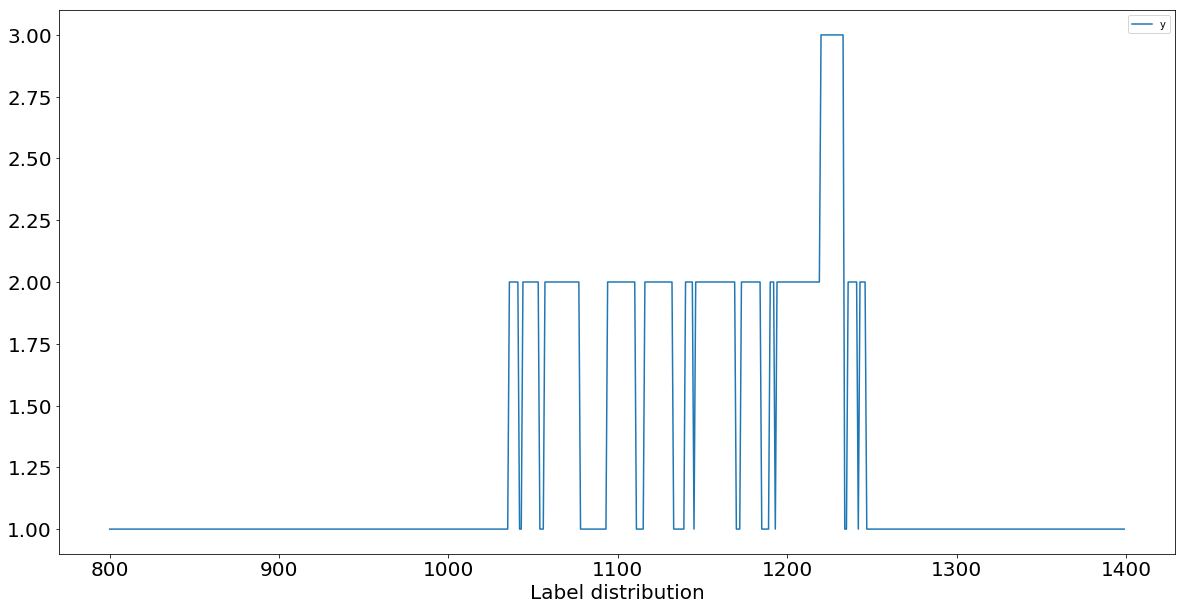

In [97]:
print("Plotting the data...")
y_train.shape
y1_train_diff = y_train.iloc[1:21399,1].values-y_train.iloc[0:21398,1].values
y1_train_diff = pd.Series(y1_train_diff, name="Diff")
print(y1_train_diff.unique())

y_train.iloc[800:1400,].plot(x="Id",y="y",figsize=(20,10), fontsize=20)
plt.xlabel('Label distribution', fontsize=20);

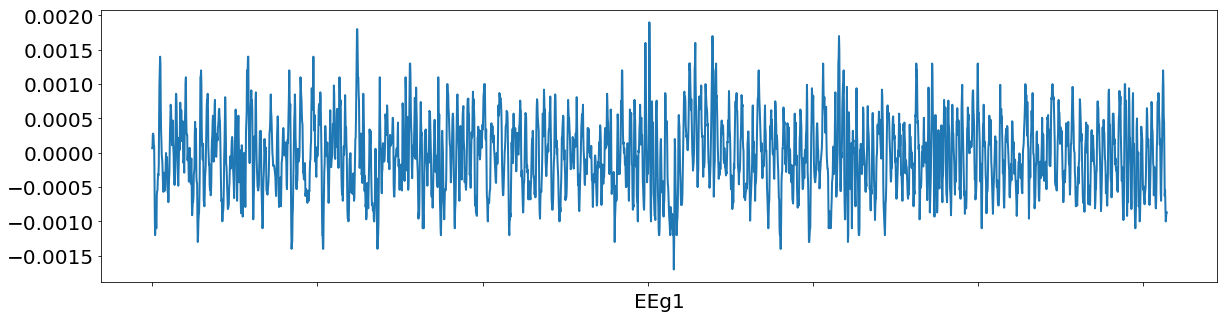

In [101]:

eeg1_ex = pd.concat([x_train_eeg1.iloc[1,],x_train_eeg1.iloc[2,],
                     x_train_eeg1.iloc[3,],x_train_eeg1.iloc[4,],
                    x_train_eeg1.iloc[5,],x_train_eeg1.iloc[6,]])
eeg1_ex.plot(figsize=(20,5), linewidth=2, fontsize=20)
plt.xlabel('EEg1', fontsize=20);

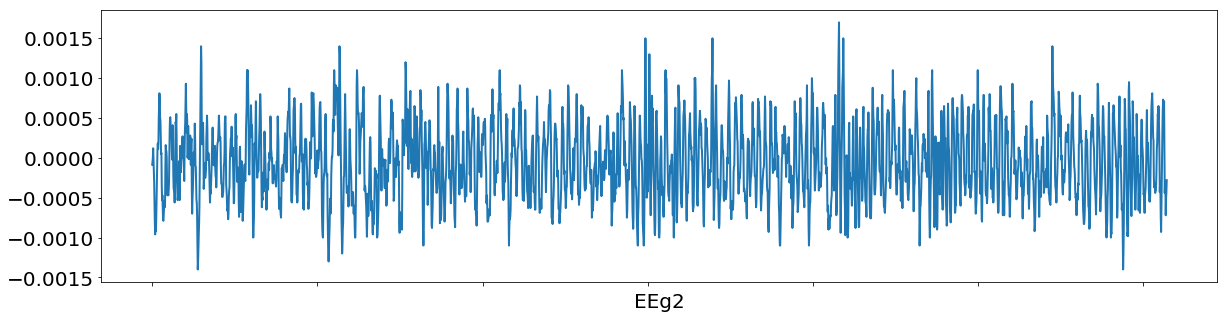

In [102]:
eeg2_ex = pd.concat([x_train_eeg2.iloc[1,],x_train_eeg2.iloc[2,],
                     x_train_eeg2.iloc[3,],x_train_eeg2.iloc[4,],
                    x_train_eeg2.iloc[5,],x_train_eeg2.iloc[6,]])
eeg2_ex.plot(figsize=(20,5), linewidth=2, fontsize=20)
plt.xlabel('EEg2', fontsize=20);

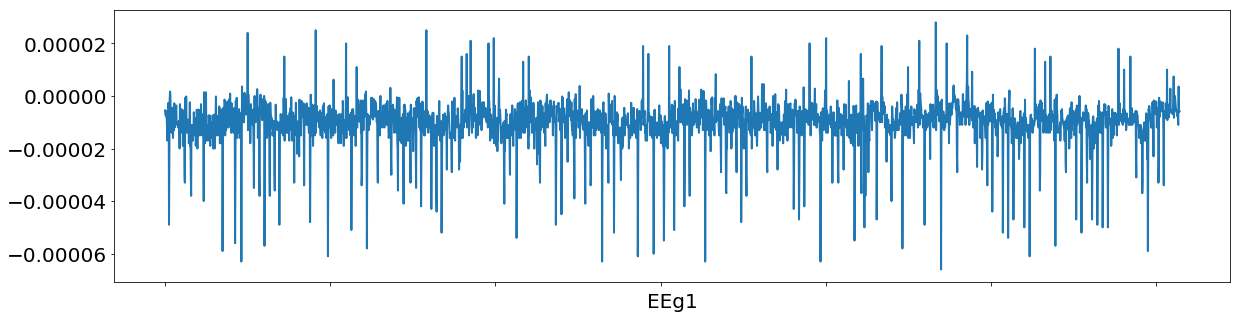

In [103]:
emg_ex = pd.concat([x_train_emg.iloc[1,],x_train_emg.iloc[2,],
                     x_train_emg.iloc[3,],x_train_emg.iloc[4,],
                    x_train_emg.iloc[5,],x_train_emg.iloc[6,]])
emg_ex.plot(figsize=(20,5), linewidth=2, fontsize=20)
plt.xlabel('EEg1', fontsize=20);